In [7]:
import cv2
import os
import glob
import shutil
import matplotlib.pyplot as plt

In [11]:
dir_tree = os.walk('DATA/train')
base_outpth = 'FilteredData/train'
os.makedirs(base_outpth,exist_ok=True)
see_mods = ['FLAIR']
see_label = 1
limit = 10
with open('train_labels.csv') as f:
    data = f.readlines()[1:] #ignore header
print('Data:',len(data))
view_ids = []
for line in data:
    pid,lbl = line.split(',')
    if int(lbl) == see_label:
        view_ids.append(pid)

Data: 585


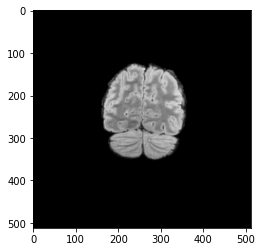

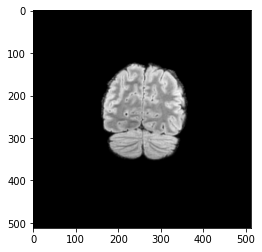

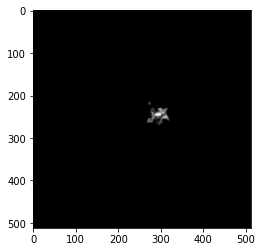

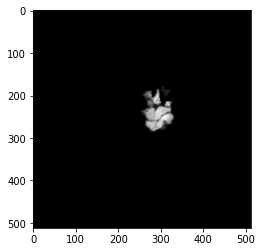

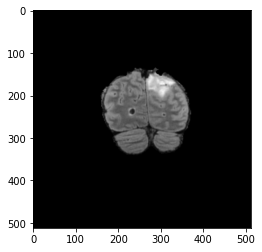

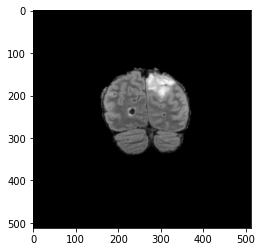

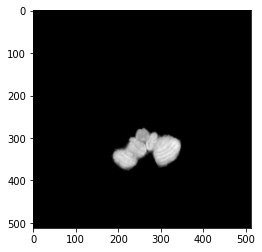

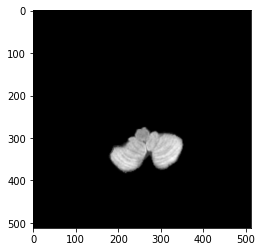

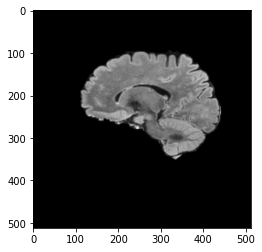

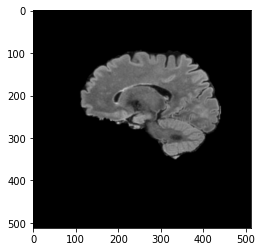

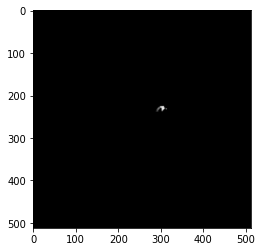

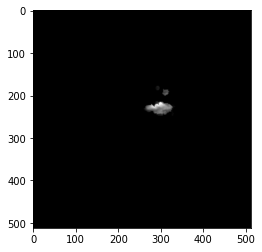

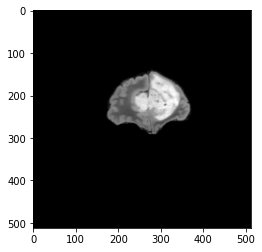

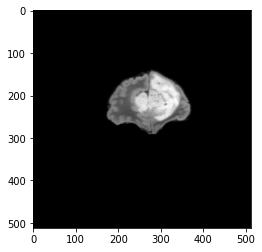

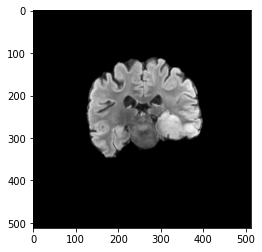

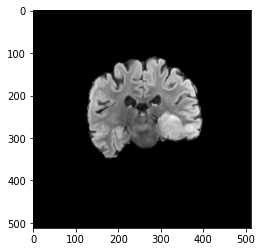

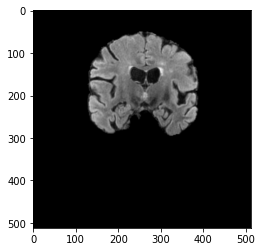

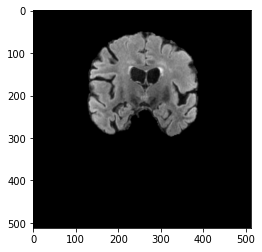

In [12]:
dir_seen = 0
for dir_num,(root,dirs,files) in enumerate(dir_tree):
    #if dir_num >= 5:
    #    break
    pat_id_dir = 1
    root = root.replace('\\','/')
    items = root.split('/')
    if len(items) >= 4: 
        pat_id = items[2]
        modality = items[3]
        if modality.upper() not in see_mods:
            continue
        if pat_id not in view_ids:
            continue
        dir_seen +=1
        if dir_seen >= limit:
            break
    files = sorted(files)
    for i,file in enumerate(files):
        if i>=2:
            break
        if pat_id_dir:
            outpath = os.path.join(base_outpth,pat_id,modality)
            os.makedirs(outpath,exist_ok=True)
            pat_id_dir = 0
            
        outfile = os.path.join(outpath,file)
        fullpath = os.path.join(root,file)
        #print('fullpath:',fullpath)
        img = plt.imread(fullpath)
        plt.imshow(img,cmap='gray')
        plt.show()
        shutil.copyfile(fullpath,outfile)

In [14]:
len(view_ids)

307